<a href="https://colab.research.google.com/github/skflwright/learning_rep/blob/main/NLP_Basic_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part of Speech Basics

In [ ]:
# Referece: https://spacy.io/usage/linguistic-features

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [ ]:
type(doc)

spacy.tokens.doc.Doc

In [ ]:
# Print the full text:
print(doc.text)

The quick brown fox jumped over the lazy dog's back.


In [ ]:
print(doc[4].text, doc[4].pos_, doc[4].tag_, spacy.explain(doc[4].tag_))

jumped VERB VBD verb, past tense


In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
quick      ADJ      JJ     adjective (English), other noun-modifier (Chinese)
brown      ADJ      JJ     adjective (English), other noun-modifier (Chinese)
fox        NOUN     NN     noun, singular or mass
jumped     VERB     VBD    verb, past tense
over       ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
lazy       ADJ      JJ     adjective (English), other noun-modifier (Chinese)
dog        NOUN     NN     noun, singular or mass
's         PART     POS    possessive ending
back       NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer


In [ ]:
doc = nlp(u'I read books on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBP    verb, non-3rd person singular present


In [ ]:
doc = nlp(u'I read a book on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBD    verb, past tense


### Counting POS Tags

In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
POS_counts

{90: 2, 84: 3, 92: 3, 100: 1, 85: 1, 94: 1, 97: 1}

In [ ]:
doc.vocab[83].text

'LANG'

### Create a frequency list of POS tags from the entire document

In [ ]:
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

84. ADJ  : 3
85. ADP  : 1
90. DET  : 2
92. NOUN : 3
94. PART : 1
97. PUNCT: 1
100. VERB : 1


# Visualizing Parts of Speech

In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [ ]:
# Render the dependency parse immediately inside Jupyter:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

The        DET     det     determiner
quick      ADJ     amod    adjectival modifier
brown      ADJ     amod    adjectival modifier
fox        NOUN    nsubj   nominal subject
jumped     VERB    ROOT    root
over       ADP     prep    prepositional modifier
the        DET     det     determiner
lazy       ADJ     amod    adjectival modifier
dog        NOUN    pobj    object of preposition
's         PART    case    case marking
back       NOUN    advmod  adverbial modifier
.          PUNCT   punct   punctuation


# ML with Scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
len(df)

5572

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
# Take a quick look at the ham and spam label column:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

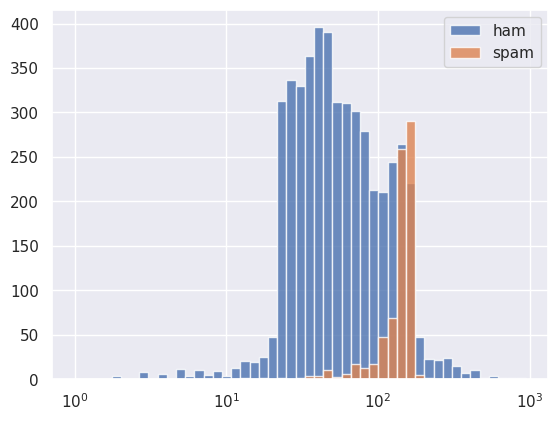

In [ ]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

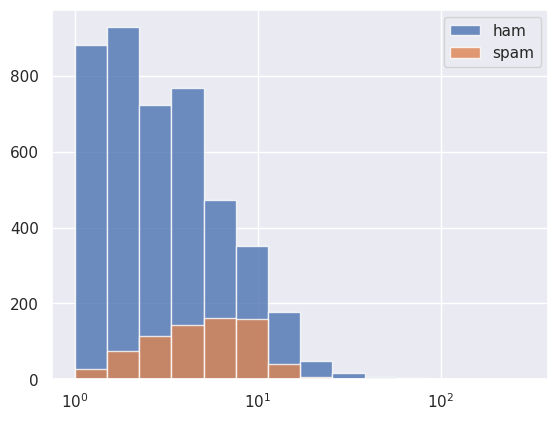

In [ ]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
# Create Feature and Label sets
X = df[['length','punct']]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


## Training classifiers

In [ ]:
lr_model = LogisticRegression(solver='lbfgs')
nb_model = MultinomialNB()
svc_model = SVC(gamma='auto')

In [ ]:
models = [lr_model, nb_model, svc_model, ]
for model in models:
    model.fit(X_train, y_train)
    print(f'{model} is trained!')

LogisticRegression() is trained!
MultinomialNB() is trained!
SVC(gamma='auto') is trained!


In [ ]:
accuracy_LogisticRegression = lr_model.score(X_test, y_test)
accuracy_nb_model = nb_model.score(X_test, y_test)
accuracy_svc_model = svc_model.score(X_test, y_test)

In [ ]:
models = {'LogisticRegression_model': accuracy_LogisticRegression, 'naïve_Bayes_model': accuracy_nb_model, 'svc_mode_model': accuracy_svc_model}

for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the LogisticRegression_model is 84.39%
The accuracy score for the naïve_Bayes_model is 86.08%
The accuracy score for the svc_mode_model is 88.64%
